### Imports

In [52]:
import os
import numpy as np
from sklearn import preprocessing, neighbors
from sklearn.model_selection import train_test_split 
from sklearn import metrics
import pandas as pd

# plotting modules
import seaborn as sns
sns.set_theme(style="darkgrid")
import matplotlib.pyplot as plt

### Load Data

In [53]:
df1 = pd.read_csv('../dataset/p1_cleaned_data.csv', index_col=0)
df2 = pd.read_csv('../dataset/p2_cleaned_data.csv', index_col=0)
df3 = pd.read_csv('../dataset/p3_cleaned_data.csv', index_col=0)

# df1 = pd.get_dummies(df1, prefix=['Gender_'], columns=['Gender'])


In [57]:
df3['Color']

0     4
1     4
2     4
3     4
4     4
     ..
88    2
89    2
90    2
91    1
92    1
Name: Color, Length: 93, dtype: int64

### Preview data and shape

In [37]:
df1.head(5)

,SL,Bar code Id,Age,Gender,BMI,Waist/Hip,Body Temperature,SpO2,Blood Pressure(sys),Blood Pressure(dia),Blood Glucose,Urinary Glucose,Urinary Protein,Pulse Rate,Blood uric acid,Color
0,215,1000236740,56,Female,21.02,0.90,97.34,98,105,70,118.8,0,0,104,8.9,4
1,116,1001011776,51,Female,21.87,0.89,97.88,98,122,66,111.6,0,0,75,7.1,4
2,39,1001014480,60,Male,27.03,0.97,95.90,95,110,71,102.6,0,0,66,8.1,4
3,52,1001014482,54,Male,25.26,0.96,93.74,96,130,86,122.4,0,0,87,8.7,4
4,75,1000898321,55,Male,22.75,1.00,94.46,98,124,83,387.0,1,0,79,3.1,4


In [38]:
df1.shape

(93, 16)

### Get Percentage of missing data in each column

<AxesSubplot:>

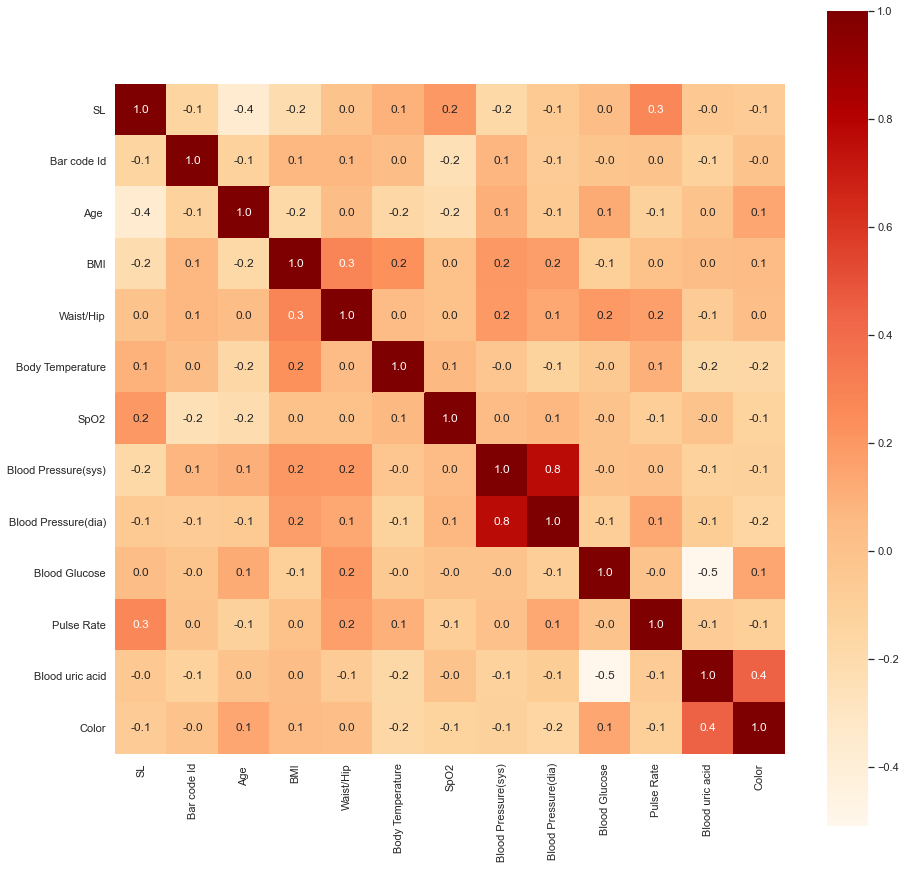

In [39]:
correlation = df1.corr()

# constructing a heatmap to undestand the correlation between the columns
plt.figure(figsize=(15,15))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':12}, cmap = 'OrRd')

### Show unique values of each non numeric columns

In [40]:
# viewing all the data to determine not numeric columns
df1.apply(lambda col: col.unique())

SL                     [215, 116, 39, 52, 75, 167, 192, 224, 145, 246...
Bar code Id            [1000236740, 1001011776, 1001014480, 100101448...
Age                    [56, 51, 60, 54, 55, 45, 58, 49, 40, 41, 57, 5...
Gender                                                    [Female, Male]
BMI                    [21.02, 21.87, 27.03, 25.26, 22.75, 30.39, 23....
Waist/Hip              [0.9, 0.89, 0.97, 0.96, 1.0, 0.94, 0.93, 0.92,...
Body Temperature       [97.34, 97.88, 95.9, 93.74, 94.46, 96.26, 96.0...
SpO2                                            [98, 95, 96, 97, 99, 93]
Blood Pressure(sys)    [105, 122, 110, 130, 124, 111, 141, 136, 119, ...
Blood Pressure(dia)    [70, 66, 71, 86, 83, 75, 89, 100, 84, 82, 60, ...
Blood Glucose          [118.8, 111.6, 102.6, 122.4, 387.0, 144.0, 142...
Urinary Glucose                                               [0, 1, +-]
Urinary Protein                                               [0, 1, +-]
Pulse Rate             [104, 75, 66, 87, 79, 92, 91

In [46]:
all_columns = df1.apply(lambda col: col.unique())
# all_columns is of type pandas.series not pandas.dataframe so drop mechanism is a little different
non_numeric_columns = all_columns.drop(labels = ['Age ','Body Temperature','SpO2','Blood Pressure(sys)','Blood Pressure(dia)','Pulse Rate','Blood uric acid'])
print(non_numeric_columns)

SL                 [215, 116, 39, 52, 75, 167, 192, 224, 145, 246...
Bar code Id        [1000236740, 1001011776, 1001014480, 100101448...
Gender                                                [Female, Male]
BMI                [21.02, 21.87, 27.03, 25.26, 22.75, 30.39, 23....
Waist/Hip          [0.9, 0.89, 0.97, 0.96, 1.0, 0.94, 0.93, 0.92,...
Blood Glucose      [118.8, 111.6, 102.6, 122.4, 387.0, 144.0, 142...
Urinary Glucose                                           [0, 1, +-]
Urinary Protein                                           [0, 1, +-]
Color                                                         [4, 3]
dtype: object


In [47]:
for key in non_numeric_columns.keys():
    print(f'---------------------------------Distinct values for {key}------------------------------------------')
    print(*non_numeric_columns[key], sep='\n')

---------------------------------Distinct values for SL------------------------------------------
215
116
39
52
75
167
192
224
145
246
138
177
268
249
57
83
129
200
205
234
81
245
35
44
89
151
40
24
262
15
19
29
38
42
54
67
72
78
82
92
96
115
137
146
162
174
186
206
207
217
239
105
256
182
26
97
99
106
193
225
124
144
226
244
12
141
73
102
109
201
216
238
260
271
18
41
88
241
23
27
31
34
49
84
100
128
149
154
172
233
235
98
143
---------------------------------Distinct values for Bar code Id------------------------------------------
1000236740
1001011776
1001014480
1001014482
1000898321
1000226230
1000227560
1000227530
1000220040
1001014659
1000234110
1000238960
1000349200
1001014644
1000783076
1000221000
1000237390
1000237570
1001014622
1001014648
1001014516
1000783964
1001014458
1000228040
1000226360
1001014541
1001014481
1001014456
1000239190
1001014447
1001014459
1000350730
1001014479
1000783065
1000226340
1001014504
1001014503
1001014517
1000236050
1001014521
1000228870
1000230800

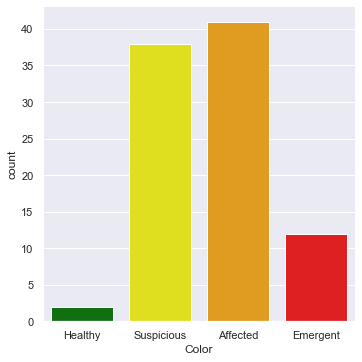

In [62]:
# Health status count for each type
legend_labels  = ['Healthy', 'Suspicious', 'Affected', 'Emergent']
sns.catplot(x='Color', data=df3, kind = 'count', palette={1:"green", 2:"yellow", 3:'orange', 4:'red'}, legend=True).set_xticklabels(legend_labels)

<AxesSubplot:ylabel='gender'>

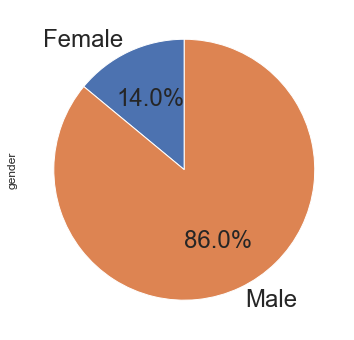

<AxesSubplot:xlabel='limit_diet', ylabel='count'>

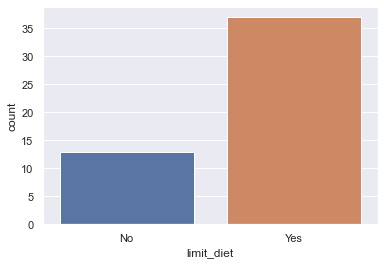

<AxesSubplot:xlabel='spo2', ylabel='count'>

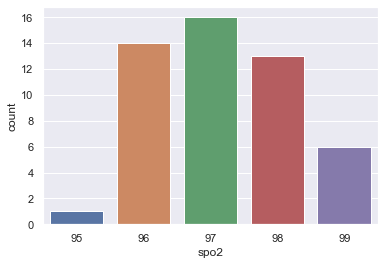

<AxesSubplot:ylabel='physical_activity'>

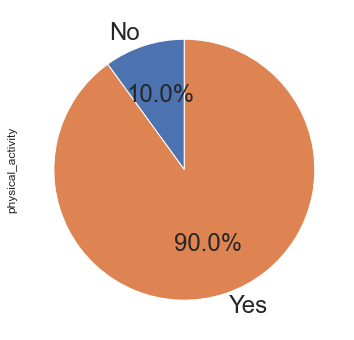

<AxesSubplot:xlabel='urinary_glucose', ylabel='count'>

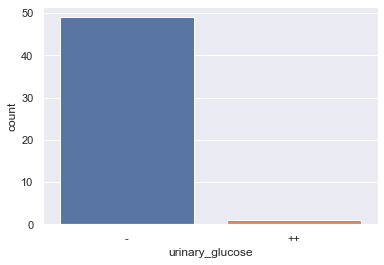

<AxesSubplot:xlabel='urinary_protein', ylabel='count'>

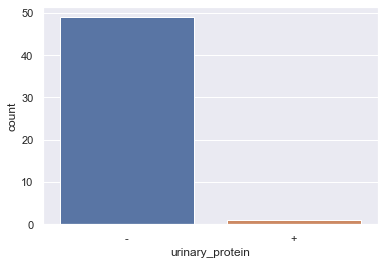